In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [3]:
# 1. Load Data
df = pd.read_excel('/kaggle/input/urdu-corpus/Urdu Corpus.xlsx')
lines = df['Text Lines'].astype(str).tolist()

In [4]:
# 2. Tokenization (character-level)
tokenizer = Tokenizer(char_level=True, filters='')
tokenizer.fit_on_texts(lines)
total_chars = len(tokenizer.word_index) + 1

In [5]:
# 3. Create sequences
input_sequences = []
seq_length = 20
for line in lines:
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(seq_length, len(encoded)):
        seq = encoded[i-seq_length:i+1]
        input_sequences.append(seq)

input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_chars)

In [6]:
# 4. Generate Urdu text (example function)
def generate_text(seed_text, next_chars=100, temperature=1.0):
    for _ in range(next_chars):
        encoded = tokenizer.texts_to_sequences([seed_text])[-1]
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        preds = model.predict(encoded, verbose=0)[0]
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_index = np.random.choice(range(total_chars), p=preds)
        next_char = tokenizer.index_word.get(next_index, '')
        seed_text += next_char
    return seed_text

In [7]:
# 5. Plot Graph 
def plot_Graph():
    epochs = range(1, len(history.history['loss']) + 1)
    
    fig, ax1 = plt.subplots(figsize=(5, 3))
    
    color = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, history.history['loss'], label='Training Loss', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs, history.history['accuracy'], label='Training Accuracy', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Training Loss and Accuracy Over Epochs')
    plt.grid(True)
    fig.tight_layout()
    plt.show()

In [8]:
# Example usage:
def example():
    seed = "بس اتنی سی بات"
    for i in range(5):
      print("Prediction", i+1, ": ", generate_text(seed, next_chars=40, temperature=0.7))

## Model: LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1751379955.654999      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751379955.655728      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/10


I0000 00:00:1751379961.796919     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


4486/4486 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.3090 - loss: 2.6498
Epoch 2/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4121 - loss: 2.1415
Epoch 3/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4445 - loss: 2.0145
Epoch 4/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4638 - loss: 1.9379
Epoch 5/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4777 - loss: 1.8848
Epoch 6/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4878 - loss: 1.8464
Epoch 7/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.4954 - loss: 1.8147
Epoch 8/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.5030 - loss: 1.7890
Epoch 9/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.5063 - loss: 1.7717
Epoch 10/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.5115 - loss: 1.7560


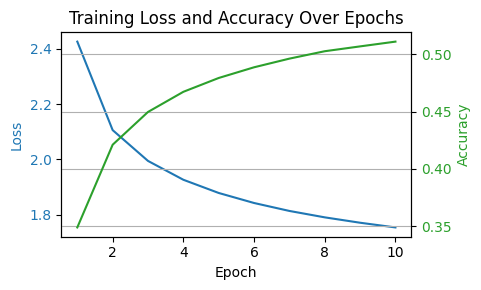

Prediction 1 :  بس اتنی سی بات جرمانہ فونہ ہوگیا ہے، ایک بجٹ میں جگہ ک
Prediction 2 :  بس اتنی سی باتی رحیت بنتی ہے۔ ان کا مجاک کی اور اس کا 
Prediction 3 :  بس اتنی سی بات میں یہ انتظامہ کی جواب ہوتی ہے۔ متعلقہ 
Prediction 4 :  بس اتنی سی بات گیا کہ کہا ۔ ایک چیز پر دھان میں علم عل
Prediction 5 :  بس اتنی سی بات کی طریقے کی کی شاکی کام کو مقدران میں د


In [8]:
# Model: LSTM
model = Sequential([
    Embedding(total_chars, 128, input_length=seq_length),
    LSTM(128, return_sequences=False),
    Dense(total_chars, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=10)

plot_Graph()
example()

# Save model
# model.save('urdu_textgen_lstm.h5')

## Model: SimpleRNN 

Epoch 1/10


I0000 00:00:1751380224.375961     102 service.cc:148] XLA service 0x7826accb99e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751380224.377521     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751380224.377543     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  43/4486 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.1670 - loss: 4.1210     

I0000 00:00:1751380225.846255     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4486/4486 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.3202 - loss: 2.6087
Epoch 2/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4254 - loss: 2.1014
Epoch 3/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4569 - loss: 1.9718
Epoch 4/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4725 - loss: 1.9138
Epoch 5/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4823 - loss: 1.8794
Epoch 6/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4877 - loss: 1.8508
Epoch 7/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4925 - loss: 1.8335
Epoch 8/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4960 - loss: 1.8199
Epoch 9/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4973 - loss: 1.8081
Epoch 10/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5008 - loss: 1.7987


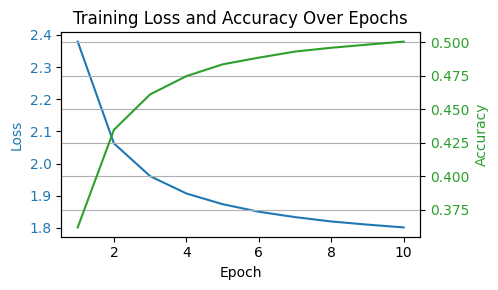

Prediction 1 :  بس اتنی سی بات کر دیا ہے۔اس نے ایک ہوئی ہے۔ صحافی ہوا 
Prediction 2 :  بس اتنی سی بات کی جبسٹ افلاس سے اس طرح سٹیدہ تخایات کے
Prediction 3 :  بس اتنی سی بات کرنے ہی ایک مقامات کی سرمایہ دیتے ہیں۔ا
Prediction 4 :  بس اتنی سی بات کی تلازی خاندان کی تحفظ سوچ ہے۔ اسی اور
Prediction 5 :  بس اتنی سی بات کم کر کر تمہاری خود سورہ اسلام میں ہیں 


In [9]:
# Model: RNN Example
model = Sequential([
    Embedding(total_chars, 128, input_length=seq_length),
    SimpleRNN(128, return_sequences=False),
    Dense(total_chars, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=10)

plot_Graph()
example()

# Save model
# model.save('urdu_textgen_rnn.h5')

## Model: GRU

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1751380678.917550      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751380678.918334      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/10


I0000 00:00:1751380683.695709      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


4486/4486 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.3394 - loss: 2.5098
Epoch 2/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.4610 - loss: 1.9563
Epoch 3/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.4903 - loss: 1.8402
Epoch 4/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5045 - loss: 1.7828
Epoch 5/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5127 - loss: 1.7486
Epoch 6/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5190 - loss: 1.7223
Epoch 7/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5230 - loss: 1.7023
Epoch 8/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5260 - loss: 1.6880
Epoch 9/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5294 - loss: 1.6724
Epoch 10/10
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.5304 - loss: 1.6682


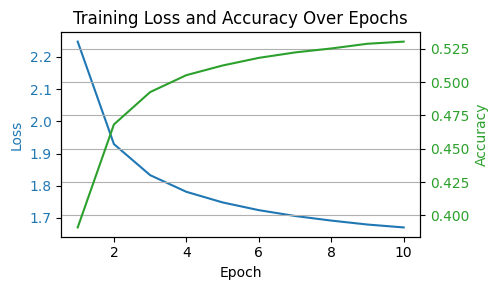

Prediction 1 :  بس اتنی سی بات سب دیو کرتا ہے اور اب کو اس کی ہے ان می
Prediction 2 :  بس اتنی سی بات کرتی رہی۔ سرکار اور باعث ہوتی ہو تو  زر
Prediction 3 :  بس اتنی سی بات چھانتے تھے اور اسکے بعد آورت کی ہے۔ ان
Prediction 4 :  بس اتنی سی بات کر دیا تو وہ ایک انہی اور ہم کیا جائے ۔
Prediction 5 :  بس اتنی سی بات چلتا ہے اور انہوں نے کہا کہ ماضی پرانسی


In [9]:
# Model: GRU
model = Sequential([
    Embedding(total_chars, 128, input_length=seq_length),
    GRU(128, return_sequences=False),
    Dense(total_chars, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=10)

plot_Graph()
example()

# Save model
# model.save('urdu_textgen_gru.h5')